# Actual lesson material

## Setup

### Background on Portal

(see slides)

Today, we're going to get started working with these data. Our goal today is to load the experimental data into our workspace, get familiar with some foundational methods for wrangling and visualizing temporal data, and use our visualizations to start to strategize how we would approach an analysis of these data. 


### Workspace setup

In [1]:
import pandas as pd
import plotnine as p9
import datetime as dt

In [2]:
# Import data

data = pd.read_csv("https://raw.githubusercontent.com/diazrenata/solid-waffle/main/rodent_abundance.csv")

In [3]:
data.head()


,censusdate,kangaroo_rat_abundance,pocket_mouse_abundance
0,1979-09-22,3,0
1,1979-10-24,6,1
2,1979-11-17,4,1
3,1980-01-15,4,0
4,1980-02-24,2,0


(Pause to check on class)

Ok, so let's orient to these  column names. 

### Convert to datetime

Ok, so one approach would be to just jump in and make our plot! Let's try this.

As a reminder, the `plotnine` package allows us to build plots using the grammar of graphics, meaning we add elements piece by piece. 

/Users/renatadiaz/opt/anaconda3/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


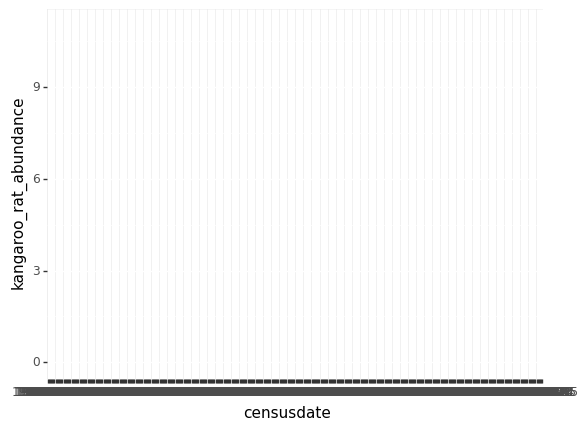

<ggplot: (8776263282875)>

In [4]:
(p9.ggplot(data, mapping = p9.aes("censusdate", "kangaroo_rat_abundance")) + p9.geom_line())

That didn't work! Let's look at this warning. Anyone know what it means?

That's ok. This is pointing us to something being out of joint around the `censusdate` column. You may also notice that the axis labels on the bottom are squished together too tightly for us to read. 

What's going on here, is python doesn't understand that the `censusdate` column is a date. It's interpreting it as genertic string object. So when we ask it to make a line plot using the date as an axis, it doesn't know to organize the data points in the right temporal order, and it can't draw a line connecting them. 

We can see this more clearly if we check on the _data types_ in this data frame. This is, by the way, good practice in general. 

In [5]:
data.dtypes

censusdate                object
kangaroo_rat_abundance     int64
pocket_mouse_abundance     int64
dtype: object

And here we see: DS and PP, our two rodent species, are recorded as integers. But `censusdate` is an object. 

This is a perennial struggle with temporal data. Have you ever tried doing this in excel? You've probably run into it there too. Fortunately, most programming languages have support for "datetime" data types. These will automatically take care of things like understanding that January comes after December, or understanding that there are 12 months in a year. 

To do this in python, we'll be working with the `datetime` module in pandas. Documentation here https://pandas.pydata.org/docs/user_guide/timeseries.html. The `datetime` module will have a lot of additional functionality that we'll get into later, but for now we want to communicate to python that the `censusdate` column is a date specified as the year, month, and day. 

For that, we have the `to_datetime` function. 

We need to tell the `to_datetime` function how the date is formatted. As we've seen before there are a lot of different ways to write a date, and we don't want the computer to have to _guess_ how the date is formatted.

These data are written as the four-digit year, two digit month, two digit day. We commjnicate this to the computer using the `format` argument, like so:

In [6]:
pd.to_datetime(data['censusdate'], format = "%Y-%m-%d")

0     1979-09-22
1     1979-10-24
2     1979-11-17
3     1980-01-15
4     1980-02-24
         ...    
429   2019-10-26
430   2019-11-24
431   2019-12-21
432   2020-01-25
433   2021-06-15
Name: censusdate, Length: 434, dtype: datetime64[ns]

As we get deeper into timeseries, we'll encounter other ways of representing dates. 

In general, when we use a new function, it's a good idea to look up the arguments in the documentation. 

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

Looksl ike this has worked, so let's go ahead and update the `censusdate` column with the correctly-formatted data:

In [7]:
data['censusdate'] = pd.to_datetime(data['censusdate'], format = "%Y-%m-%d")

And check that we've got the correct data types:

In [8]:
data.dtypes

censusdate                datetime64[ns]
kangaroo_rat_abundance             int64
pocket_mouse_abundance             int64
dtype: object

(Pause to make sure the class has caught up)

## Plotting raw data with the `datetime` axis

Ok, now let's see if we can plot the temporal data...

I'm going to start by plotting the kangaroo rat data. 


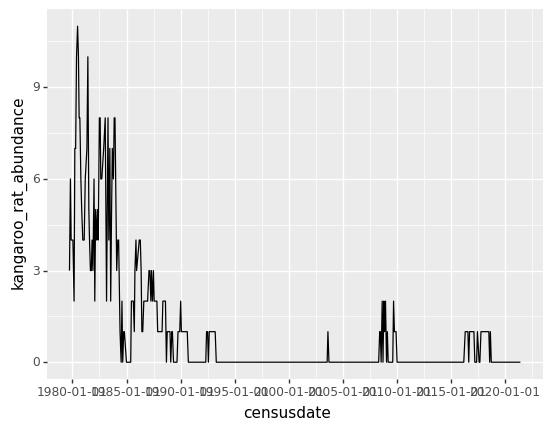

<ggplot: (8776279871281)>

In [9]:
(p9.ggplot(data, 
           mapping = p9.aes("censusdate", "kangaroo_rat_abundance"))
 + p9.geom_line())

Ok, so what do we see about these data over time? As a reminder, the site changed from a desert to a shrubland from the 1980s to the mid 1990s. How did the kangaroo rats seem to respond to that?

Yeah, they hated it. In fact, they were believed to be locally extinct for a while. 

So that's the kangaroo rats. How about the pocket mice? I'm going to give you all a second to see if you can make this plot for the pocket mice without me. It's going to be very similar to the code we just used to make the kangaroo rat plot!

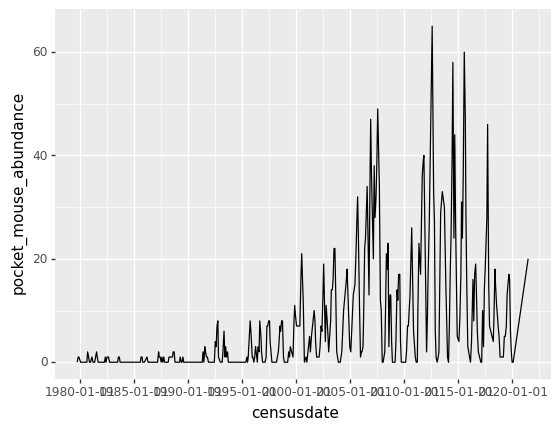

<ggplot: (8776279871663)>

In [10]:
(p9.ggplot(data, 
           mapping = p9.aes("censusdate", "pocket_mouse_abundance")) 
 + p9.geom_line())

So what do we see in these data for how the little pocket mice are responding over time?

Yeah, they're getting more abundant. 

In [11]:
#(p9.ggplot(data, mapping = p9.aes("censusdate", "kangaroo_rat_abundance")) + 
# p9.geom_line() + 
# p9.geom_line(mapping = p9.aes(y = "pocket_mouse_abundance"), color = "green"))

Okay, so we've got some preliminary insight from these plots about the general way things are trending over the course of 40 years. But these plots bring up some other concepts we're going to be learning a lot more about as we get into temporal data. 

Maybe some of you have already noticed, but there's a lot of variability in these data, especially the pocket mice, within years. In fact, this species essentially hibernates in the winter, meaning they're not captured at all. And that generates a very strong seasonal signal in the data. Many many of the systems we will be interested in looking at in terms of timeseries data will have seasonal signals.

Discussion:

- Examples of other seasonal data?


Discussion: 

- Which poses a question: how would you approach analyzing data if we see it has a strong seasonal component? 

Coming out of that discussion:

- One approach is to summarize things over the course of a year, taking either the mean or the sum. 
- There are more sophisticated approaches that involve "decomposing" a time series into different components. We'll progress to those in a later lesson.
- For now, let's practice working with the datetime data type and compute some annual summaries for these data.

## Manipulation of datetimes

Ok, so what's the first step in computing *annual* summaries for these? Let's go back to the columns in this dataset.

In [12]:
data.head()

,censusdate,kangaroo_rat_abundance,pocket_mouse_abundance
0,1979-09-22,3,0
1,1979-10-24,6,1
2,1979-11-17,4,1
3,1980-01-15,4,0
4,1980-02-24,2,0


We have columns for `censusdate`, and we want to get the year out of that. The datetime datatype automatically understands this, so we can use `dt` to ask for specifically the year. 

In [13]:
data['year'] = data['censusdate'].dt.year

data.head()

,censusdate,kangaroo_rat_abundance,pocket_mouse_abundance,year
0,1979-09-22,3,0,1979
1,1979-10-24,6,1,1979
2,1979-11-17,4,1,1979
3,1980-01-15,4,0,1980
4,1980-02-24,2,0,1980


Ok, so we've gotten the `year` out. So now we can perform our usual group by transform operation (which I'll assume we have covered before):

In [14]:
annual_data = data.groupby('year', as_index = False)[["kangaroo_rat_abundance", "pocket_mouse_abundance"]].sum()
annual_data

annual_data.head()

,year,kangaroo_rat_abundance,pocket_mouse_abundance
0,1979,13,2
1,1980,82,3
2,1981,55,5
3,1982,55,4
4,1983,69,2


(pause to see who's with me)

Ok! So, as a last step, let's remake our plot.

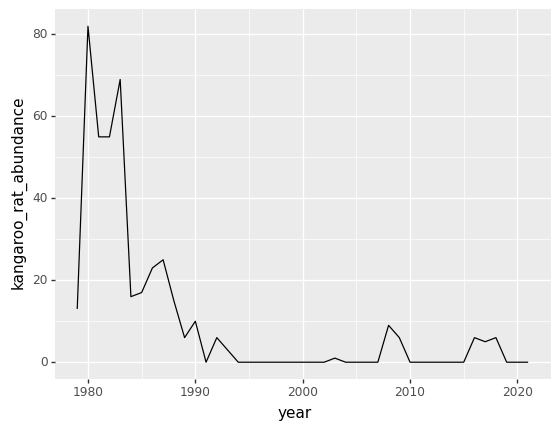

<ggplot: (8776312923308)>

In [15]:
(p9.ggplot(annual_data, mapping = p9.aes('year', 'kangaroo_rat_abundance')) + p9.geom_line())

(p9.ggplot(annual_data, mapping = p9.aes('year', 'pocket_mouse_abundance')) + p9.geom_line())

Ok, so to recap.

- We've talked about why we as data scientists need to be familiar with time series.
- We've gotten our feet wet working with timeseries in python, and done the hardest part, which is formatting dates 
- We've started to engage with some of the *conceptual* issues that make timeseries unique. We've used annual summaries to get around some of that, but next up we will be getting into more sophisticated methods for wrangling and analyzing temporal data.

